<a href="https://colab.research.google.com/github/Divya-523/CMSC_491_MR_PROJECT/blob/main/MR_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [ ]:
# Define custom Individually Penalized Ridge class
class IndividuallyPenalizedRidge:
    def __init__(self, penalties):
        """
        Initialize with a list of penalties (lambdas), one for each feature.
        """
        self.penalties = np.array(penalties)
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fits a Ridge Regression model with individual penalties for each feature.
        """
        # Scale each feature by the square root of its penalty
        X_scaled = X / np.sqrt(self.penalties)

        # Fit ridge regression with common penalty (alpha=1.0, since scaling incorporates penalties)
        ridge_model = Ridge(alpha=1.0, fit_intercept=True)
        ridge_model.fit(X_scaled, y)

        # Scale back the coefficients to adjust for individual penalties
        self.coef_ = ridge_model.coef_ / np.sqrt(self.penalties)
        self.intercept_ = ridge_model.intercept_

    def predict(self, X):
        """
        Predicts using the fitted model.
        """
        return X @ self.coef_ + self.intercept_

In [ ]:
# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define range of penalty values to try during optimization
penalty_values = np.logspace(-2, 1, 10)  # Range from 0.01 to 10

# Optimize individual penalties for each feature
def optimize_individual_penalties(X_train, y_train, penalty_values):
    best_penalties = []
    for feature in range(X_train.shape[1]):
        ridge_cv = RidgeCV(alphas=penalty_values)
        ridge_cv.fit(X_train[:, [feature]], y_train)
        best_penalties.append(1 / ridge_cv.alpha_)  # Store inverse of alpha for each feature's best penalty
    return np.array(best_penalties)

# Find optimized penalties
optimized_penalties = optimize_individual_penalties(X_train, y_train, penalty_values)

# Train the Individually Penalized Ridge Regression model with optimized penalties
ip_ridge_optimized = IndividuallyPenalizedRidge(penalties=optimized_penalties)
ip_ridge_optimized.fit(X_train, y_train)

# Make predictions
y_pred_optimized = ip_ridge_optimized.predict(X_test)

# Calculate and display MSE
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print(" Mean Squared Error:", mse_optimized)
print("Coefficients:", ip_ridge_optimized.coef_)
print("Intercept:", ip_ridge_optimized.intercept_)

 Mean Squared Error: 1.0588341917253974
Coefficients: [16.90409961 54.13702284  5.07861373 63.51067729 92.9327831  70.47940043
 86.50855125 10.18933199  3.16187965 70.69015835]
Intercept: -0.006490167947804437


Text(0.5, 1.0, 'Actual vs Predicted Values')

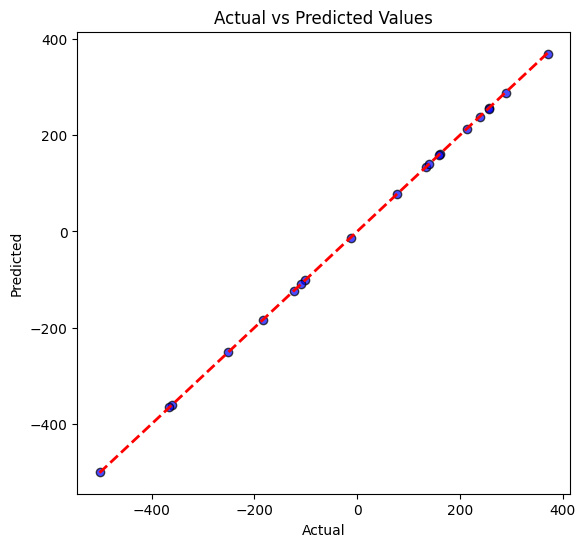

In [ ]:
# Visualization
plt.figure(figsize=(14, 6))

# Plot actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_optimized, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')

Plot the penalties chosen for each feature.

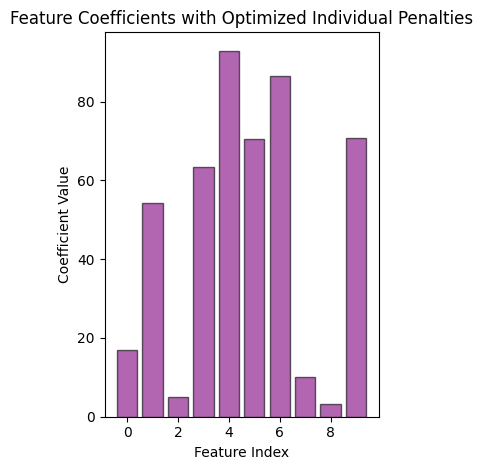

In [ ]:
# Plot optimized coefficient values to visualize effect of penalties
plt.subplot(1, 2, 2)
plt.bar(range(len(ip_ridge_optimized.coef_)), ip_ridge_optimized.coef_, color='purple', alpha=0.6, edgecolor='k')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value') #Penalty Values
plt.title('Feature Coefficients with Optimized Individual Penalties')

plt.tight_layout()
plt.show()

In [ ]:
# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define polynomial degree and ElasticNet alpha range
degree = 2
alphas = np.logspace(-4, 0, 50)  # Range of regularization values
l1_ratios = np.linspace(0.1, 1.0, 10)  # Mix of L1 and L2 penalties

# Pipeline for PolynomialFeatures, StandardScaler, and ElasticNetCV
pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
    ("scaler", StandardScaler()),
    ("elasticnet", ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, max_iter=10000))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse_optimized = mean_squared_error(y_test, y_pred)
elasticnet_model = pipeline.named_steps['elasticnet']
print("Optimized Mean Squared Error:", mse_optimized)
print("ElasticNet Coefficients:", elasticnet_model.coef_)
print("ElasticNet Intercept:", elasticnet_model.intercept_)
print("Best L1 Ratio:", elasticnet_model.l1_ratio)
print("Number of Features Used:", np.sum(np.abs(elasticnet_model.coef_) > 0))

Optimized Mean Squared Error: 0.02480964555487528
ElasticNet Coefficients: [ 1.49908035e+01  4.63199380e+01  4.61870359e+00  5.98308149e+01
  9.17281109e+01  6.54958186e+01  8.81822983e+01  1.05516875e+01
  3.27211503e+00  6.17006051e+01  0.00000000e+00  1.60557399e-03
  0.00000000e+00 -9.75575838e-03  0.00000000e+00  4.96186383e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  8.42456627e-03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.49379838e-03 -0.00000000e+00
 -2.66765153e-03  3.01136972e-03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.15967881e-02
  1.62026979e-03  3.58254120e-03 -4.09463867e-03 -0.00000000e+00
 -0.00000000e+00 -2.95428338e-03 -1.37486377e-02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.52686463e-0

In [ ]:
# Define custom Individually Penalized Ridge class
class IndividuallyPenalizedRidge:
    def __init__(self, penalties):
        """
        Initialize with a list of penalties (lambdas), one for each feature.
        """
        self.penalties = np.array(penalties)
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fits a Ridge Regression model with individual penalties for each feature.
        """
        # Scale each feature by the square root of its penalty
        X_scaled = X / np.sqrt(self.penalties)

        # Fit ridge regression with common penalty (alpha=1.0, since scaling incorporates penalties)
        ridge_model = Ridge(alpha=1.0, fit_intercept=True)
        ridge_model.fit(X_scaled, y)

        # Scale back the coefficients to adjust for individual penalties
        self.coef_ = ridge_model.coef_ / np.sqrt(self.penalties)
        self.intercept_ = ridge_model.intercept_

    def predict(self, X):
        """
        Predicts using the fitted model.
        """
        return X @ self.coef_ + self.intercept_

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define range of penalty values to try during optimization
penalty_values = np.logspace(-2, 1, 10)

# Optimize individual penalties for each feature
def optimize_individual_penalties(X_train, y_train, penalty_values):
    best_penalties = []
    for feature in range(X_train.shape[1]):
        ridge_cv = RidgeCV(alphas=penalty_values)
        ridge_cv.fit(X_train[:, [feature]], y_train)
        best_penalties.append(1 / ridge_cv.alpha_)  # Store inverse of alpha for each feature's best penalty
    return np.array(best_penalties)

# Find optimized penalties
optimized_penalties = optimize_individual_penalties(X_train, y_train, penalty_values)

# Define models
degree = 2
alphas = np.logspace(-4, 0, 50)
l1_ratios = np.linspace(0.1, 1.0, 10)
models = {
    "Individually Penalized Ridge": IndividuallyPenalizedRidge(penalties=optimized_penalties),
    "ElasticNet": Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, max_iter=10000))
    ]),
    "Ridge": Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", RidgeCV(alphas=alphas, cv=5))
    ]),
    "Lasso": Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LassoCV(alphas=alphas, cv=5, max_iter=10000))
    ]),
    "Linear Regression": Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ])
}

# Fit and evaluate each model
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    coefficients = model.named_steps['model'].coef_ if hasattr(model, 'named_steps') else model.coef_
    results.append((model_name, mse, r2, coefficients))

# Convert results to a structured format
results_df = pd.DataFrame(results, columns=["Model", "MSE", "R^2 Score", "Coefficients"])

# Display the results
print(results_df[["Model", "MSE", "R^2 Score"]])

                          Model       MSE  R^2 Score
0  Individually Penalized Ridge  1.058834   0.999982
1                    ElasticNet  0.024810   1.000000
2                         Ridge  0.245000   0.999996
3                         Lasso  0.024810   1.000000
4             Linear Regression  0.243918   0.999996


**Evaluate Model Performance:**
1.Compare actual vs. predicted values using scatter plots.
2.Visualize residual errors.

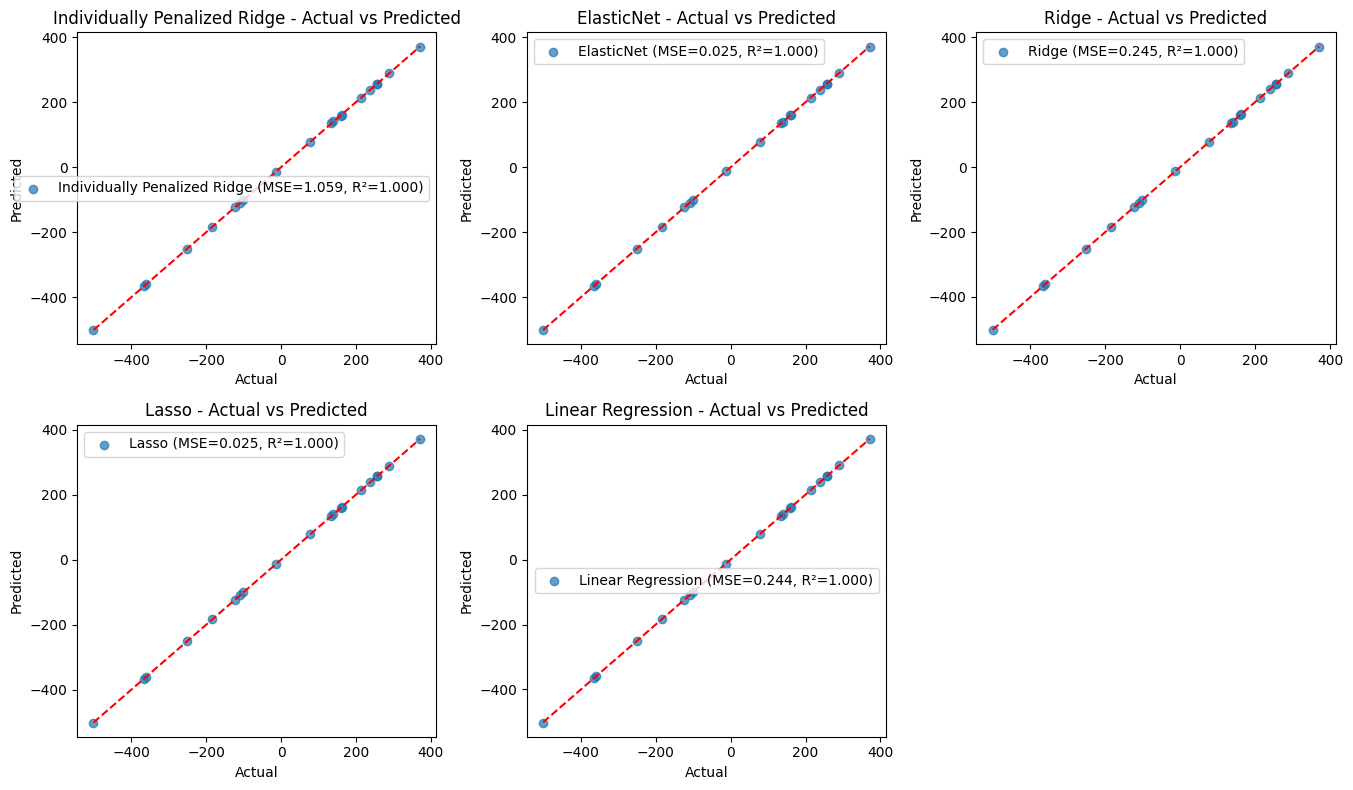

In [ ]:
# Visualization
plt.figure(figsize=(14, 8))

# Actual vs Predicted plot
for i, (model_name, mse, r2, coefficients) in enumerate(results):
    plt.subplot(2, 3, i + 1)
    y_pred = models[model_name].predict(X_test)
    plt.scatter(y_test, y_pred, label=f"{model_name} (MSE={mse:.3f}, R²={r2:.3f})", alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.title(f"{model_name} - Actual vs Predicted")

plt.tight_layout()
plt.show()

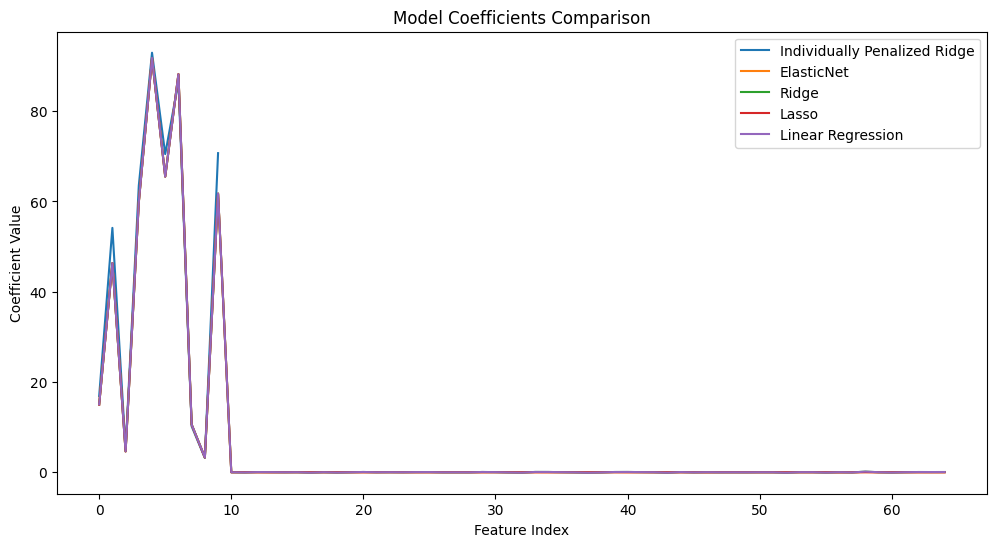

In [ ]:
# Coefficient comparison plot
plt.figure(figsize=(12, 6))
for i, (model_name, mse, r2, coefficients) in enumerate(results):
    plt.plot(coefficients, label=f"{model_name}")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Model Coefficients Comparison")
plt.legend()
plt.show()

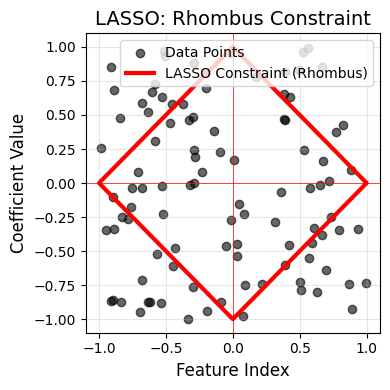

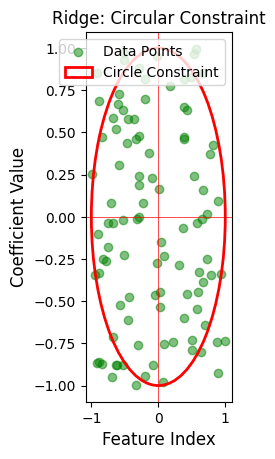

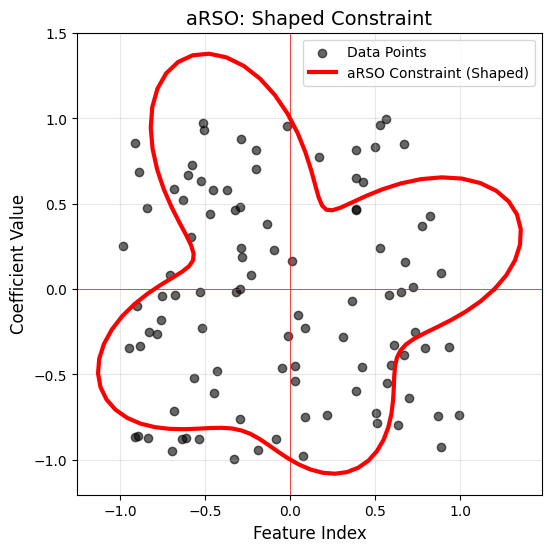

In [ ]:
# Generate some random data points if 'points' is not defined
# Assuming you want 100 points with 2 features
num_points = 100
num_features = 2
points = np.random.rand(num_points, num_features) * 2 - 1  # points between -1 and 1

# LASSO (Rhombus Constraint)
plt.figure(figsize=(4, 4))

# Scatter plot of data points
plt.scatter(points[:, 0], points[:, 1], color='black', alpha=0.6, label="Data Points")

# Draw the rhombus (L1 constraint)
rhombus_boundary = np.array([
    [0, 1], [1, 0], [0, -1], [-1, 0], [0, 1]  # Vertices of the rhombus
                             ])
plt.plot(rhombus_boundary[:, 0], rhombus_boundary[:, 1], 'r-', linewidth=3, label="LASSO Constraint (Rhombus)")

# Add axis lines
plt.axhline(0, color='red', linewidth=0.5)
plt.axvline(0, color='red', linewidth=0.5)

# Styling
plt.title("LASSO: Rhombus Constraint", fontsize=14)
plt.xlabel("Feature Index", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

# Plot for Ridge (Circle Constraint)
plt.subplot(1, 3, 2)
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2, label="Circle Constraint")
plt.scatter(points[:, 0], points[:, 1], color='green', alpha=0.5, label="Data Points")
plt.gca().add_artist(circle)
plt.axhline(0, color='red', linewidth=0.5)
plt.axvline(0, color='red', linewidth=0.5)
plt.title("Ridge: Circular Constraint")
plt.xlabel("Feature Index", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.legend()


# aRSO (Shaped Constraint)
plt.figure(figsize=(6, 6))

# Scatter plot of data points
plt.scatter(points[:, 0], points[:, 1], color='black', alpha=0.6, label="Data Points")

# Create a shaped (adaptive) boundary for aRSO
theta = np.linspace(0, 2 * np.pi, 100)
r = 1 + 0.3 * np.sin(4 * theta) + 0.2 * np.cos(3 * theta)  # Irregular boundary equation
x = r * np.cos(theta)
y = r * np.sin(theta)

# Plot the shaped boundary
plt.plot(x, y, 'r-', linewidth=3, label="aRSO Constraint (Shaped)")

plt.axhline(0, color='red', linewidth=0.5)
plt.axvline(0, color='red', linewidth=0.5)

plt.title("aRSO: Shaped Constraint", fontsize=14)
plt.xlabel("Feature Index", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()